## Observations and Insights

1- There are no Outliers for Ceftamin and Infubinol
2- Correlation coeficient is 0.84 which is really good. This increases the chances of Accuracy of our prediction.
3- Ramicane has least SEM (Standard Error of Mean), this is good as whatever sample we will choose , it will be close to actual mean. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
# Combine the data into a single dataset
merge_result=pd.merge(mouse_metadata,study_results,on="Mouse ID")
merge_result.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merge_result_df = merge_result.groupby(['Drug Regimen'])
merge_result_mean=round(merge_result_df['Tumor Volume (mm3)'].mean(),2)
merge_result_median=round(merge_result_df['Tumor Volume (mm3)'].median(),2)
merge_result_var=round(merge_result_df['Tumor Volume (mm3)'].var(),2)
merge_result_std=round(merge_result_df['Tumor Volume (mm3)'].std(),2)
merge_result_sem=round(merge_result_df['Tumor Volume (mm3)'].sem(),2)
#Creating DataFrame
summ_table_df=pd.DataFrame({"mean":merge_result_mean,"median":merge_result_median,"variance":merge_result_var,"standard deviation":merge_result_std,
                            "standard error of the mean(SEM)":merge_result_sem})
summ_table_df

,mean,median,variance,standard deviation,standard error of the mean(SEM)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

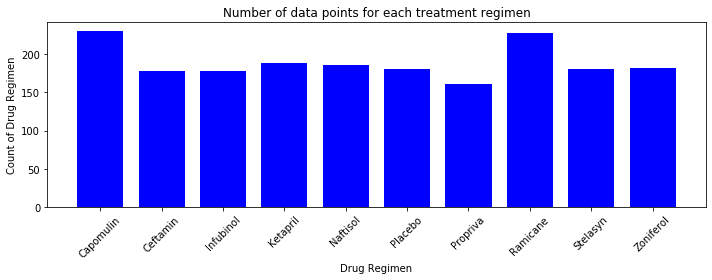

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#finding the count per Drug Regimen
bar_plot_table=merge_result_df['Drug Regimen'].count()
#Creating new DataFrame
bar_plot_table_df=pd.DataFrame({"Count of Drug Regimen":bar_plot_table})
#Plotting the Bar Graph
bar_plot_table_df.plot(kind="bar",color='b',figsize=(10,4),legend=False,alpha=1,rot=45,width=0.75)
#Labeling the graph with X,Y coordinates,titles and displaying with proper layout
plt.title("Number of data points for each treatment regimen")
plt.ylabel("Count of Drug Regimen")
plt.xlabel("Drug Regimen")
plt.axis('tight')
plt.tight_layout()
plt.show()

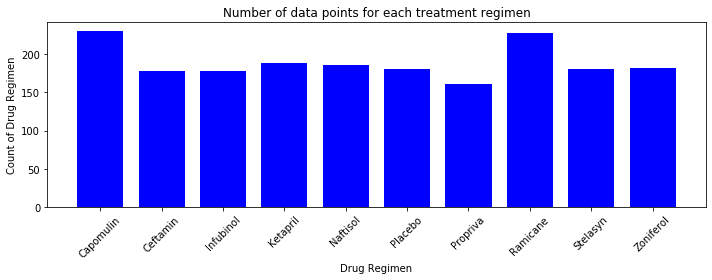

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#creating list from dataframe data
yaxis_merge_results=bar_plot_table_df['Count of Drug Regimen'].tolist()
xaxis_count_result=bar_plot_table_df.index.get_level_values(0).tolist()
x_axis = np.arange(len(xaxis_count_result)) 
#Ploting the graph
plt.figure(figsize=(10,4))
plt.bar(x_axis,yaxis_merge_results,color='b', alpha=1, align="center",width=0.75)
#Creating ticks on X bar and labeling them 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xaxis_count_result,rotation=45)
#Labeling the graph with X,Y coordinates,titles and displaying with proper layout
plt.axis('tight')
plt.title("Number of data points for each treatment regimen")
plt.ylabel("Count of Drug Regimen")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()

## Pie plots

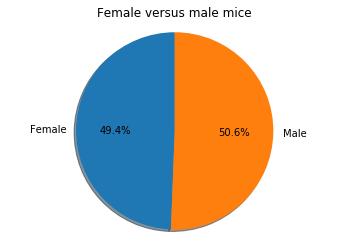

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_pie=merge_result.groupby(['Sex'])
mouse_sex_plot_pie=mouse_sex_pie['Sex'].count()
#Plotting Pie Chart
mouse_sex_plot_pie.plot(kind="pie",shadow=True, startangle=90,autopct="%1.1f%%")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
#Displaying title
plt.title("Female versus male mice")
#Removing Y lable
plt.ylabel('')
plt.show()

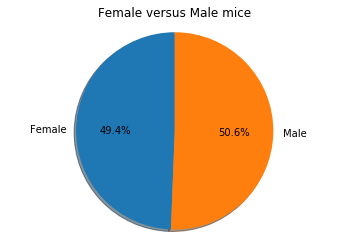

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_plot_pie_df=pd.DataFrame({"Count":mouse_sex_plot_pie})
count_mouse=mouse_sex_plot_pie_df['Count'].tolist()
sex_of_mouse=mouse_sex_plot_pie_df.index.get_level_values(0).tolist()
#Plotting Pie Chart
plt.pie(count_mouse,shadow=True, startangle=90,autopct="%1.1f%%", labels=sex_of_mouse)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
#Displaying title
plt.title("Female versus Male mice")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Successful Drug Regimen list
successful_regimen=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#Creating data frame for successful drug regimen
successful_regimen_df=merge_result[merge_result['Drug Regimen'].isin(successful_regimen)]
#Grouping by based on Drug Regimen and Musie Id
successful_regimen_gby=successful_regimen_df.groupby(['Drug Regimen','Mouse ID'])
#Summing the Volumn based on Mouse id
vol_successful_regimen=pd.DataFrame(successful_regimen_gby['Tumor Volume (mm3)'].sum())

#Defining List
Outliers=[]
Outlier_list=[]
#For loop to get the qutlier for successful regimen
for successful_regim in successful_regimen:
    all_limits=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)==successful_regim].quantile([.25,.5,.75])
    Outliers.append(pd.DataFrame({"Drug Regimen":successful_regim,"All limits":all_limits['Tumor Volume (mm3)'],}))
#For loop for lower and upper quartile and IQR
for i in range(len(successful_regimen)):
    lower=Outliers[i-1].loc[(0.25),"All limits"]
    upper=Outliers[i-1].loc[(0.75),"All limits"]
    IQR=upper-lower
    lower_bound=lower - (1.5*IQR)
    upper_bound=upper + (1.5*IQR)
    current_regimen=Outliers[i-1].loc[(0.25),"Drug Regimen"]
    #Printing the IQR
    print(f"IQR for {current_regimen} is {round(IQR,4)}")
    Outlier_single=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)==current_regimen]
    Outlier_list.append(pd.DataFrame(Outlier_single.loc[(Outlier_single["Tumor Volume (mm3)"]<lower_bound)|(Outlier_single["Tumor Volume (mm3)"]>upper_bound)]))
print("")
#Concatenate all the data frame for outlier and display them 
print("Following are the Outliers: ")
pd.concat(Outlier_list)


IQR for Ceftamin is 346.4337
IQR for Capomulin is 63.2522
IQR for Ramicane is 46.5123
IQR for Infubinol is 289.4527

Following are the Outliers: 


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    f966              182.529864
             r157              183.195878
             w150              124.154476
Ramicane     w678               88.166373
             y449              181.439088

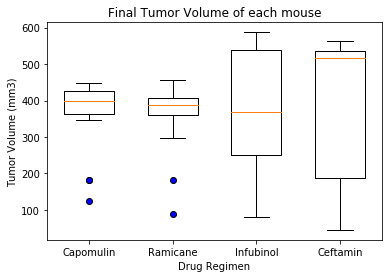

In [8]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Creating seperate Dataframe for individual Drug Regimen
Capomulin=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)=='Capomulin']
Capomulin_vol=Capomulin['Tumor Volume (mm3)']
Ramicane=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)=='Ramicane']
Ramicane_vol=Ramicane['Tumor Volume (mm3)']
Infubinol=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)=='Infubinol']
Infubinol_vol=Infubinol['Tumor Volume (mm3)']
Ceftamin=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)=='Ceftamin']
Ceftamin_vol=Ceftamin['Tumor Volume (mm3)']
#Plottog Box plot
fig1, ax1 = plt.subplots()
Data_df=[Capomulin_vol,Ramicane_vol,Infubinol_vol,Ceftamin_vol]
ax1.set_title('Final Tumor Volume of each mouse')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(successful_regimen)
ax1.set_xlabel('Drug Regimen')
blue_outlier = dict(markerfacecolor='b')
ax1.boxplot(Data_df,widths = 0.6, patch_artist = False,flierprops=blue_outlier)
plt.show()

# Line and scatter plots

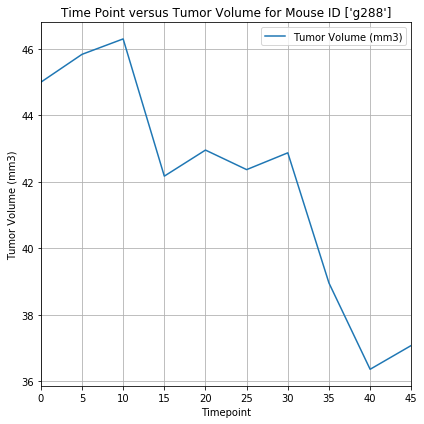

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Dataframe for Capomulin 
line_regimen_all=merge_result[merge_result['Drug Regimen']=='Capomulin']
#creating list for one mosuse id with random name
line_regimen_one=line_regimen_all['Mouse ID'].sample().tolist()
#Finding all the data for one random mouse
line_regimen=line_regimen_all[line_regimen_all['Mouse ID'].isin(line_regimen_one)]
#plotting line plot
line_regimen_plt=line_regimen.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(6,6),title=f"Time Point versus Tumor Volume for Mouse ID {line_regimen_one}")
#Labeling Graphs
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.tight_layout()
plt.show()

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


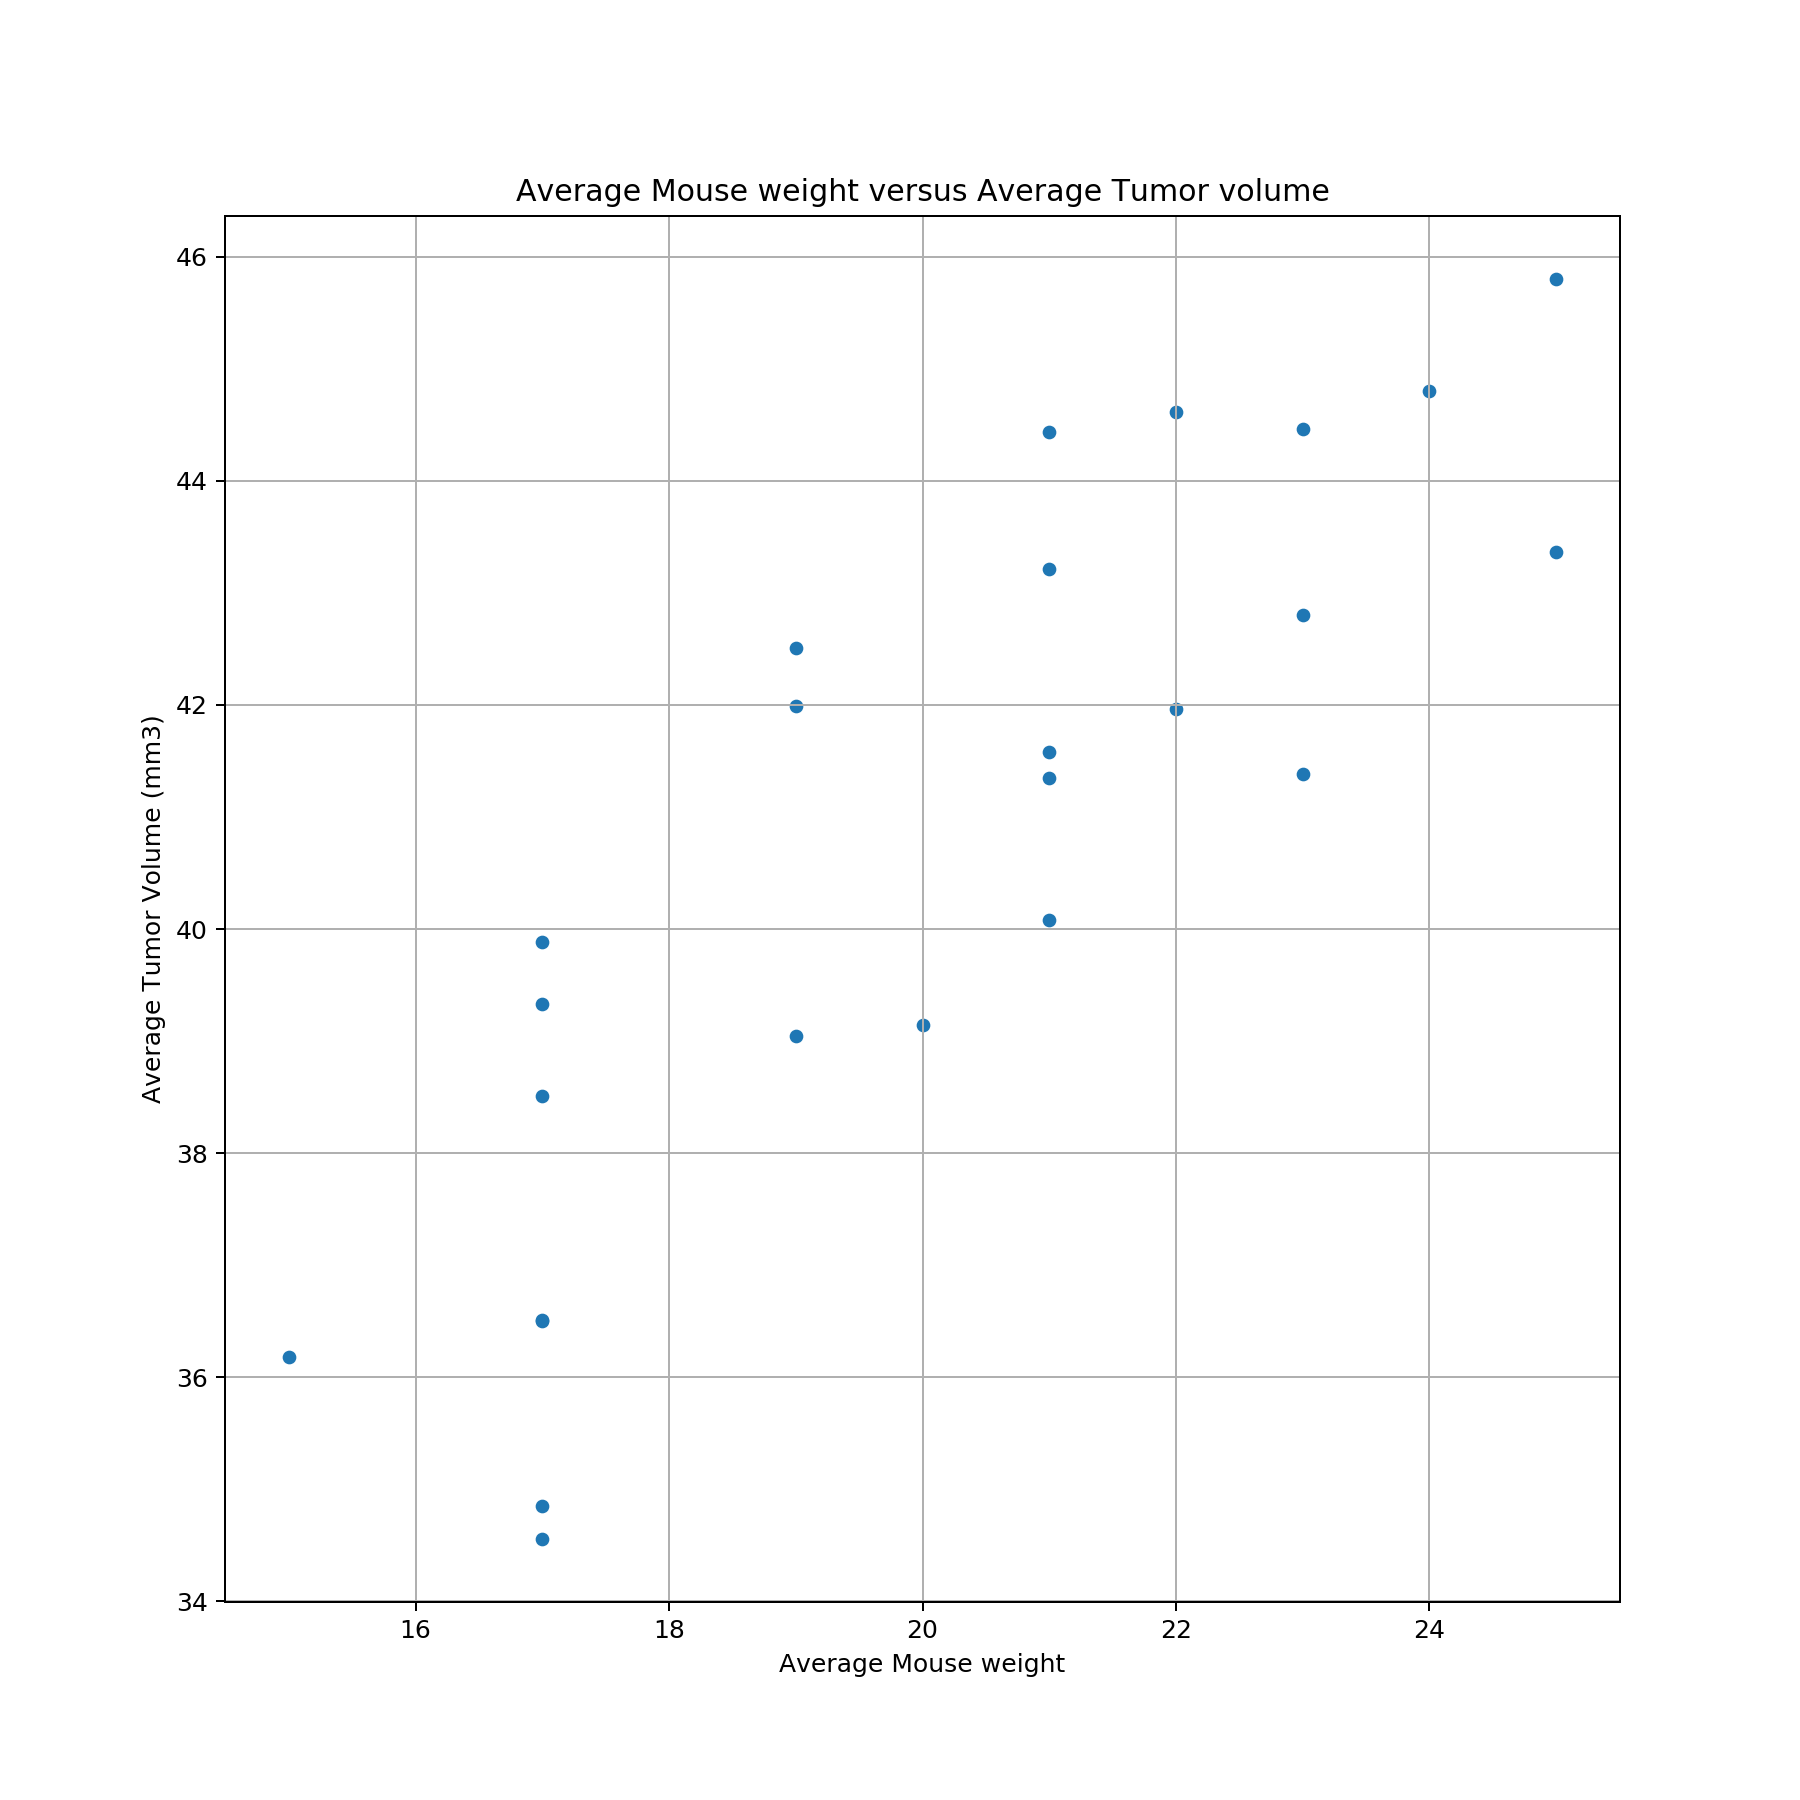

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Gorup by for scatter plot
scatter_regimen = line_regimen_all.groupby(["Mouse ID"])
#Finding average for the weight
scatter_regimen_weight=scatter_regimen["Weight (g)"].mean()
#Finding average volumn 
scatter_regimen_volumn=scatter_regimen["Tumor Volume (mm3)"].mean()
#Creating DataFrame
scatter_regimen_df=pd.DataFrame({"scatter_regimen_weight":scatter_regimen_weight,"scatter_regimen_volumn":scatter_regimen_volumn})
#Plotting Scatter Plot
scatter_regimen_df.plot(kind="scatter", x='scatter_regimen_weight', y='scatter_regimen_volumn', grid=True, figsize=(10,10),title="Average Mouse weight versus Average Tumor volume")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Average Mouse weight")
plt.show()

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#Calculating linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_regimen_weight, scatter_regimen_volumn)
regress_values = scatter_regimen_weight * slope + intercept
#Line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plotting the line
plt.plot(scatter_regimen_weight,regress_values,"r-")
#Plotting the line equation
plt.annotate(line_eq,(22,36),fontsize=15,color="red")
plt.show()
print(f"correlation coefficient is : {rvalue}")

correlation coefficient is : 0.8419363424694718
